In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#  https://www.kaggle.com/datasets/vikramamin/bank-loan-approval-lr-dt-rf-and-auc

In [10]:
data=pd.read_csv('bankloan.csv')

In [11]:
data

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [12]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP.Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal.Loan', 'Securities.Account',
       'CD.Account', 'Online', 'CreditCard'],
      dtype='object')

In [13]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP.Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal.Loan           int64
Securities.Account      int64
CD.Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [14]:
data.describe()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [15]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

In [16]:
data.columns = data.columns.str.lower().str.replace('.', '_')
data

,id,age,experience,income,zip_code,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [17]:
data.columns

Index(['id', 'age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'personal_loan', 'securities_account',
       'cd_account', 'online', 'creditcard'],
      dtype='object')

In [19]:
data['personal_loan'].value_counts()

personal_loan
0    4520
1     480
Name: count, dtype: int64

In [ ]:
# df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

C:\Users\adeye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adeye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adeye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adeye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

ValueError: num must be an integer with 1 <= num <= 6, not 7

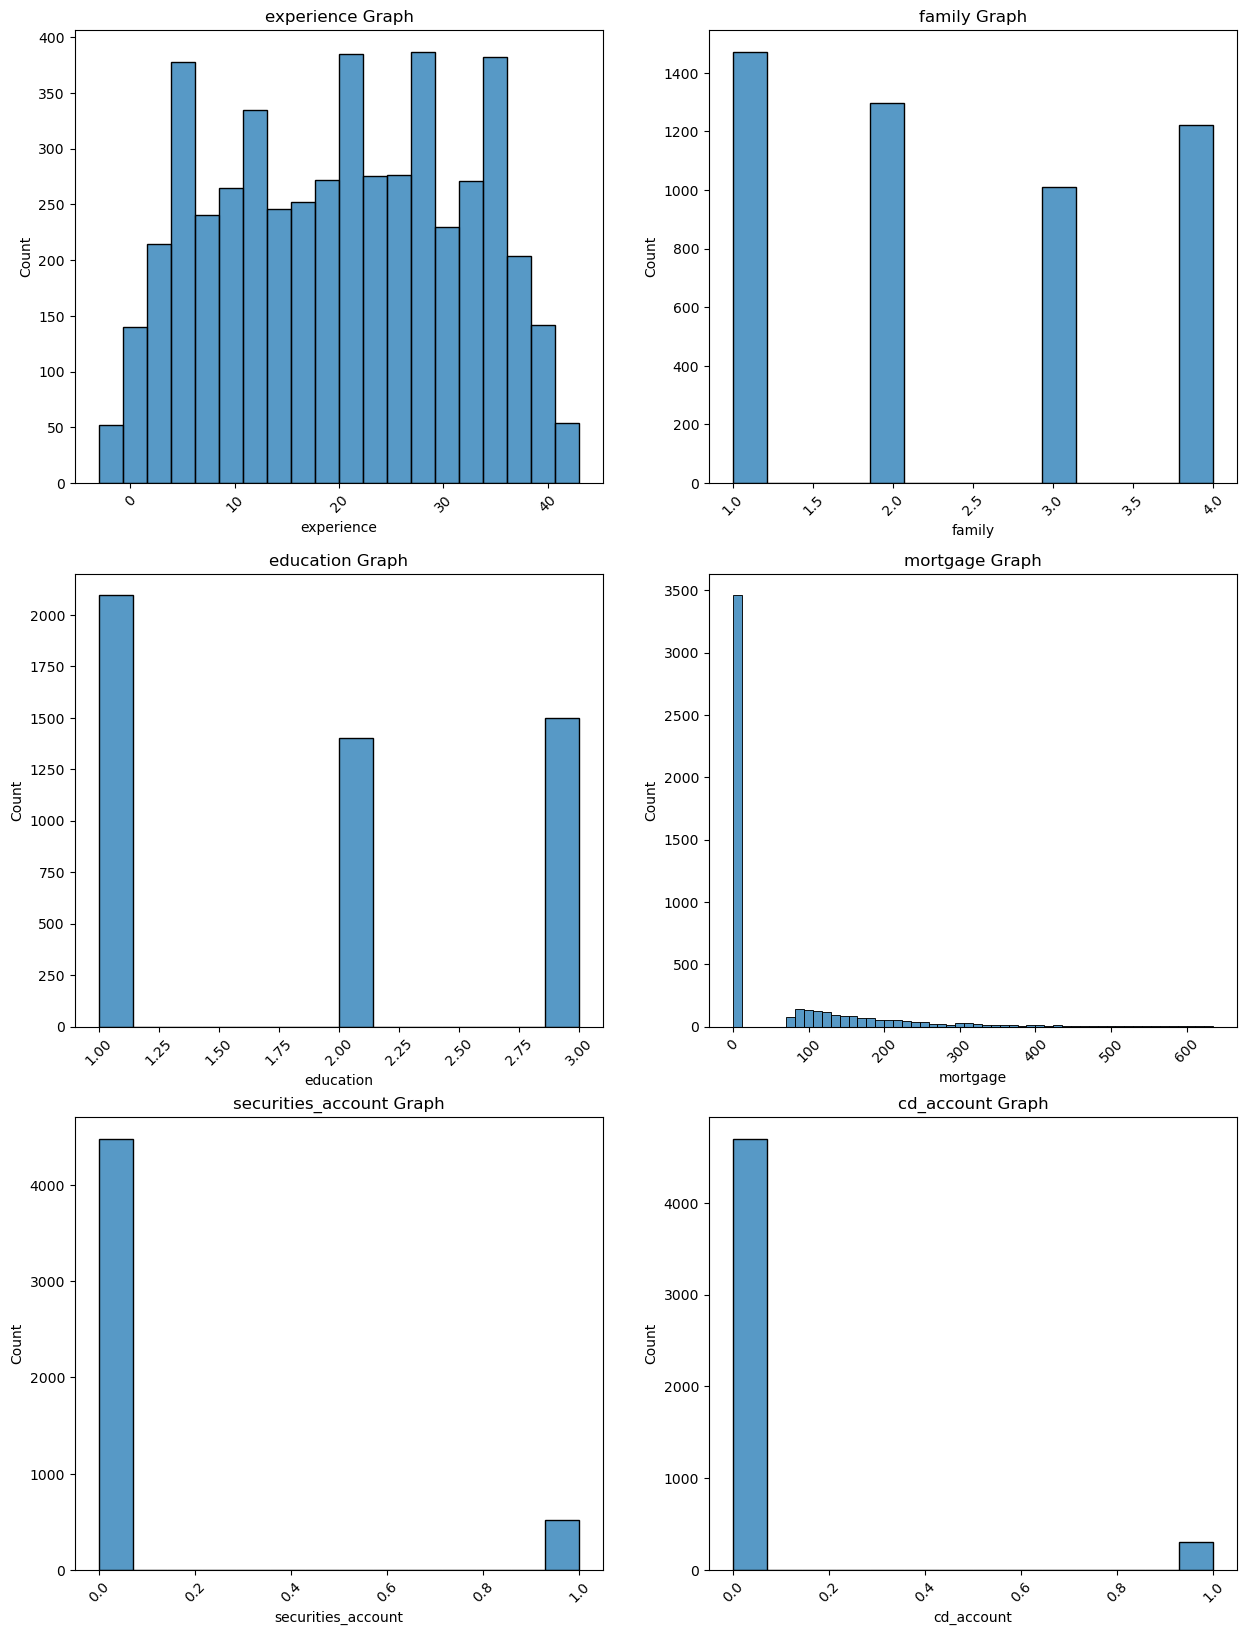

In [23]:
non_numerical_cols = ['experience', 'family', 'education', 'mortgage', 'securities_account',
       'cd_account', 'online', 'creditcard']

# Define the number of rows and columns for subplots
num_rows = 3
num_cols = 2

# Create a new figure
plt.figure(figsize=(15, 20))

position = 1

for col in non_numerical_cols:
    plt.subplot(num_rows, num_cols, position)
    sns.histplot(data[col])
    plt.xlabel(col)
    plt.title(f"{col} Graph")
    plt.xticks(rotation = 45)
    position = position + 1

# Adjust the layout and add a super title
plt.tight_layout()
plt.show()

C:\Users\adeye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adeye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adeye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adeye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

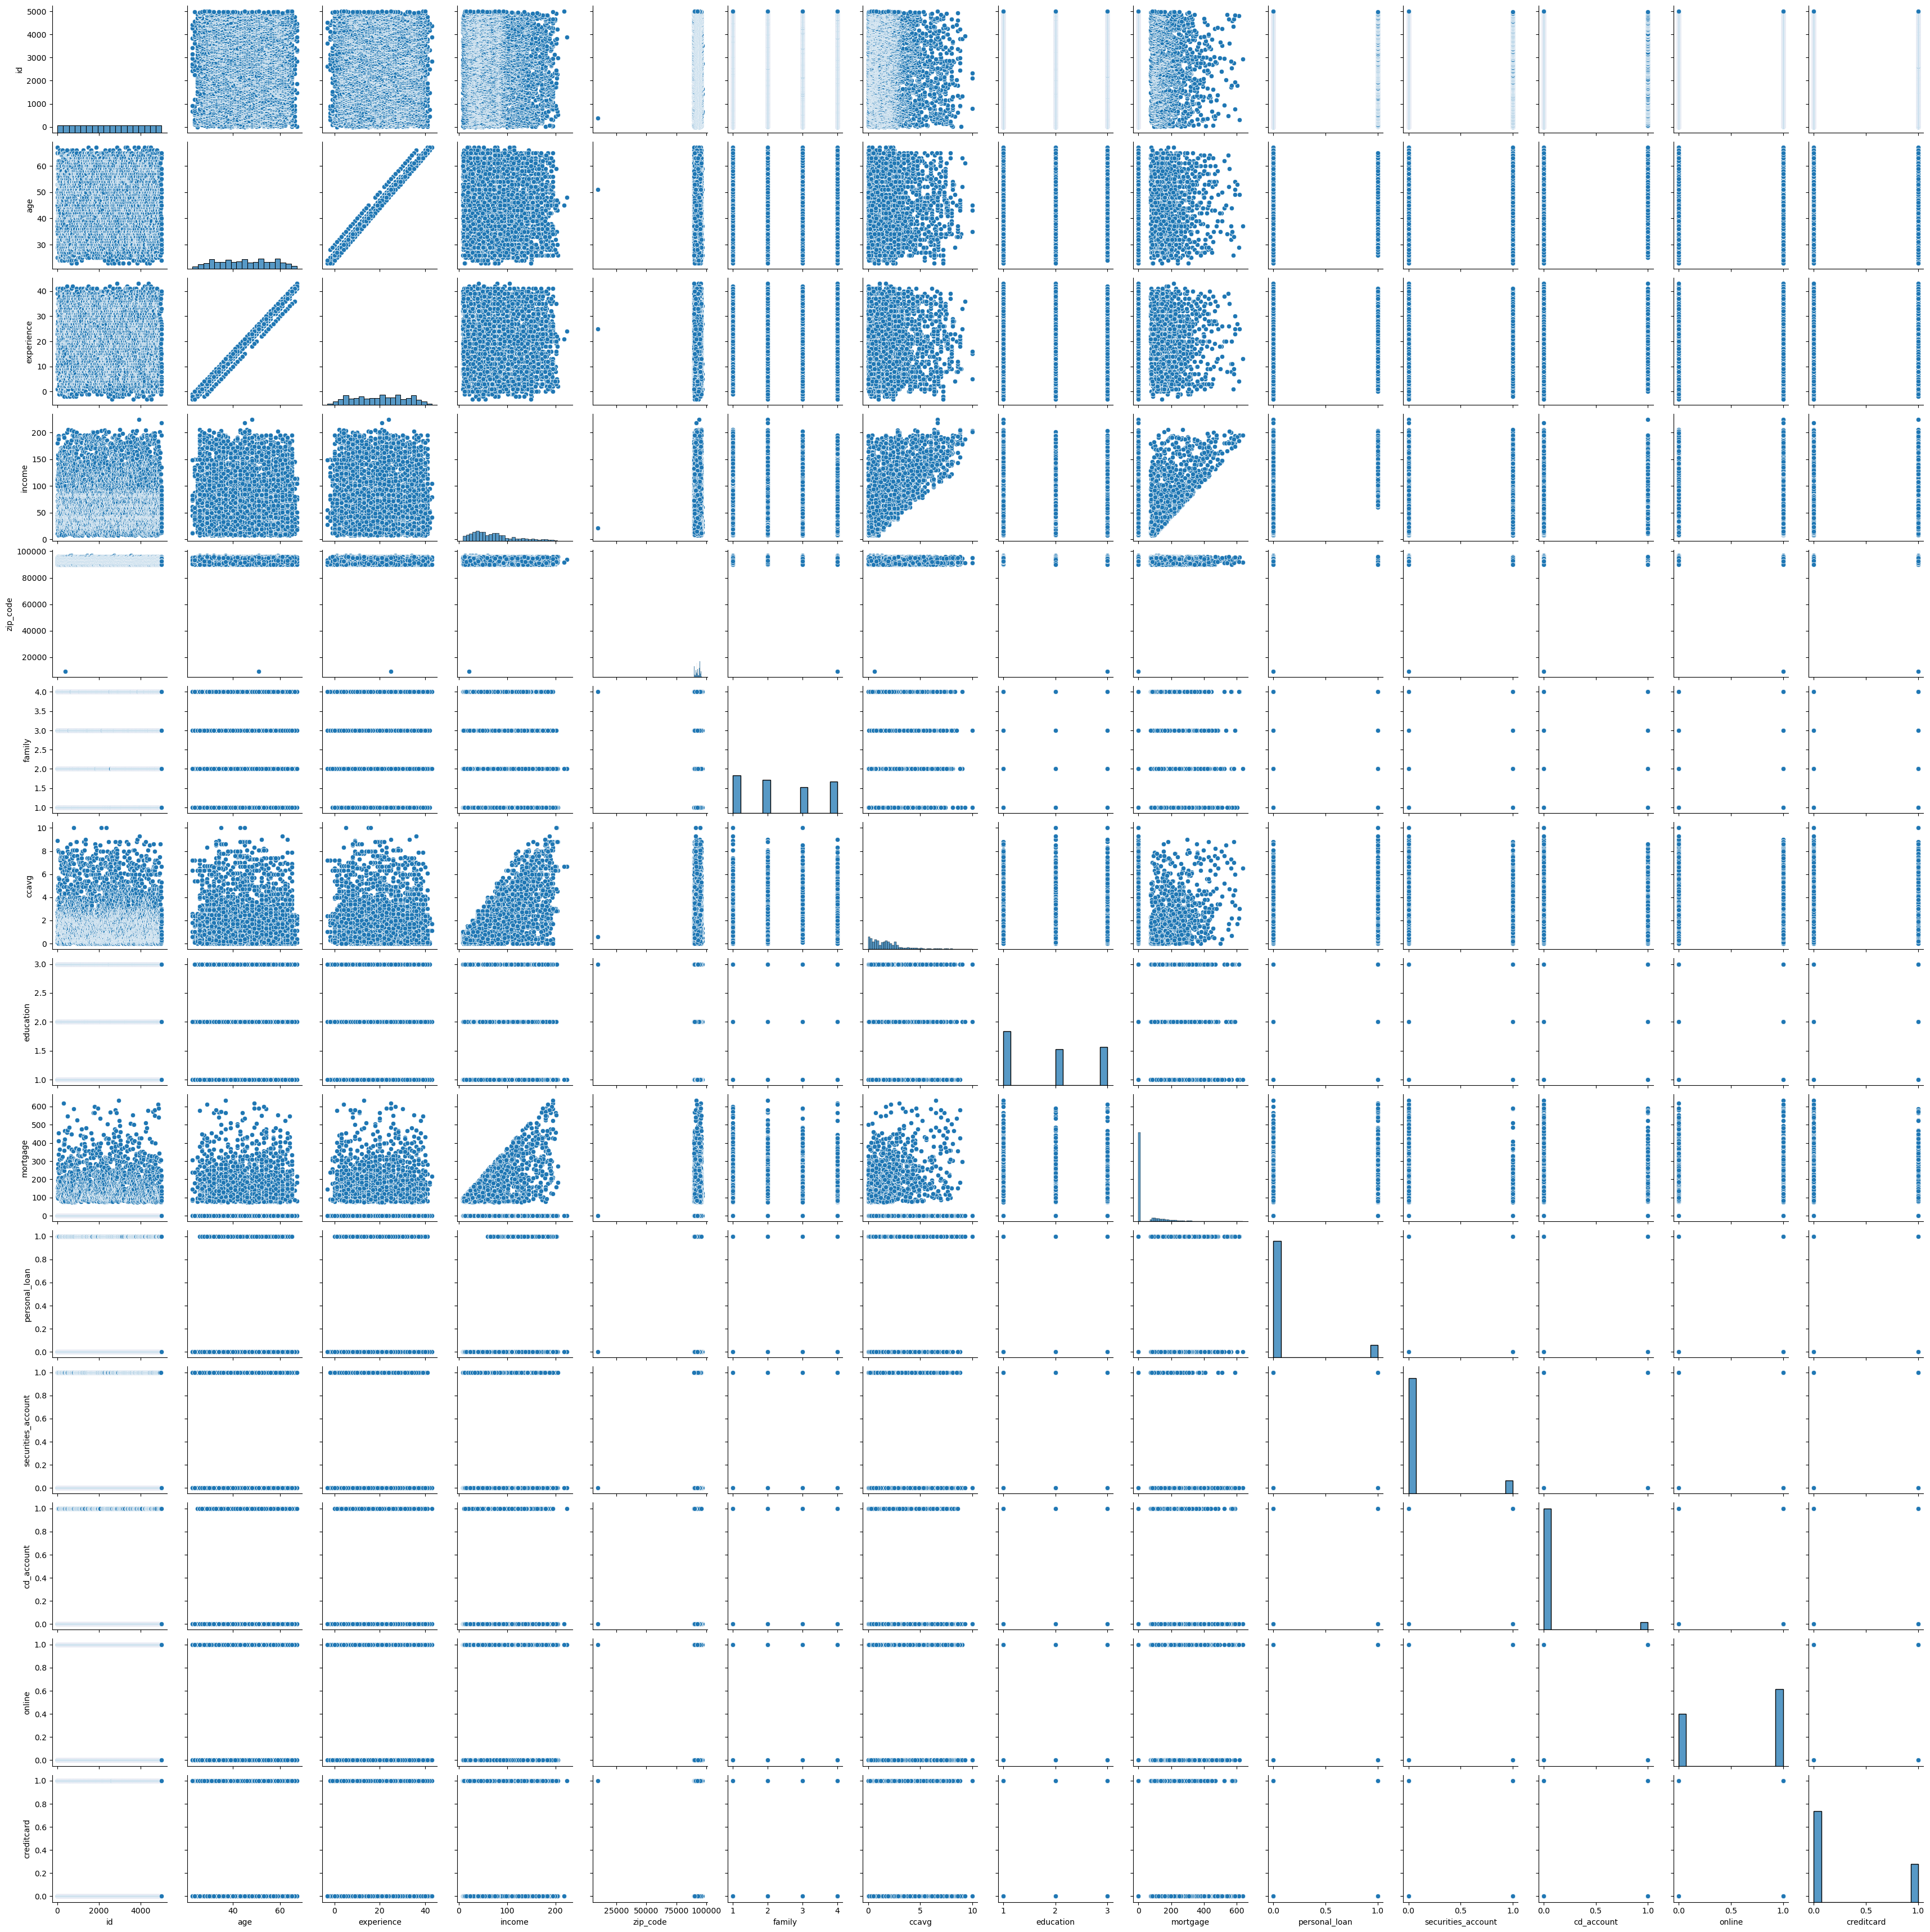

In [24]:
sns.pairplot(data)

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [28]:
len(data), len(df_train) +len(df_val) +len(df_test)

(5000, 5000)

In [29]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [30]:
y_train = df_train.personal_loan.values
y_val = df_val.personal_loan.values
y_test = df_test.personal_loan.values

del df_train['personal_loan']
del df_val['personal_loan']
del df_test['personal_loan']

In [31]:
from sklearn.feature_extraction import DictVectorizer

In [32]:
dv = DictVectorizer(sparse=True)


train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [ ]:
from sklearn.metrics import mutual_info_score

In [33]:
numerical_cols=['age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage','securities_account',
       'cd_account', 'online', 'creditcard']

In [34]:
df_full_train[numerical_cols].corrwith(df_full_train.personal_loan)

age                  -0.017048
experience           -0.016848
income                0.503815
zip_code              0.001261
family                0.062430
ccavg                 0.373651
education             0.142333
mortgage              0.148119
securities_account    0.019530
cd_account            0.320243
online                0.013130
creditcard            0.000794
dtype: float64

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

## Decision Tree Classifier

In [37]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [39]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.9712300237569466

In [40]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- income <= 98.50
|   |--- ccavg <= 3.05
|   |   |--- ccavg <= 2.95
|   |   |   |--- class: 0
|   |   |--- ccavg >  2.95
|   |   |   |--- family <= 3.50
|   |   |   |   |--- class: 0
|   |   |   |--- family >  3.50
|   |   |   |   |--- class: 1
|   |--- ccavg >  3.05
|   |   |--- cd_account <= 0.50
|   |   |   |--- ccavg <= 3.95
|   |   |   |   |--- ccavg <= 3.85
|   |   |   |   |   |--- experience <= 5.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- experience >  5.50
|   |   |   |   |   |   |--- id <= 1079.50
|   |   |   |   |   |   |   |--- ccavg <= 3.65
|   |   |   |   |   |   |   |   |--- family <= 3.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- family >  3.00
|   |   |   |   |   |   |   |   |   |--- ccavg <= 3.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- ccavg >  3.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- ccavg >  3

In [42]:

from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn import metrics
from sklearn import tree

[Text(0.40198863636363635, 0.9615384615384616, 'x[8] <= 98.5\ngini = 0.165\nsamples = 3000\nvalue = [2727, 273]'),
 Text(0.125, 0.8846153846153846, 'x[1] <= 3.05\ngini = 0.016\nsamples = 2255\nvalue = [2237, 18]'),
 Text(0.045454545454545456, 0.8076923076923077, 'x[1] <= 2.95\ngini = 0.001\nsamples = 2157\nvalue = [2156, 1]'),
 Text(0.022727272727272728, 0.7307692307692307, 'gini = 0.0\nsamples = 2140\nvalue = [2140, 0]'),
 Text(0.06818181818181818, 0.7307692307692307, 'x[6] <= 3.5\ngini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(0.045454545454545456, 0.6538461538461539, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.09090909090909091, 0.6538461538461539, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.20454545454545456, 0.8076923076923077, 'x[2] <= 0.5\ngini = 0.287\nsamples = 98\nvalue = [81, 17]'),
 Text(0.1590909090909091, 0.7307692307692307, 'x[1] <= 3.95\ngini = 0.24\nsamples = 93\nvalue = [80, 13]'),
 Text(0.13636363636363635, 0.6538461538461539, 'x[1] <= 3.85\ng

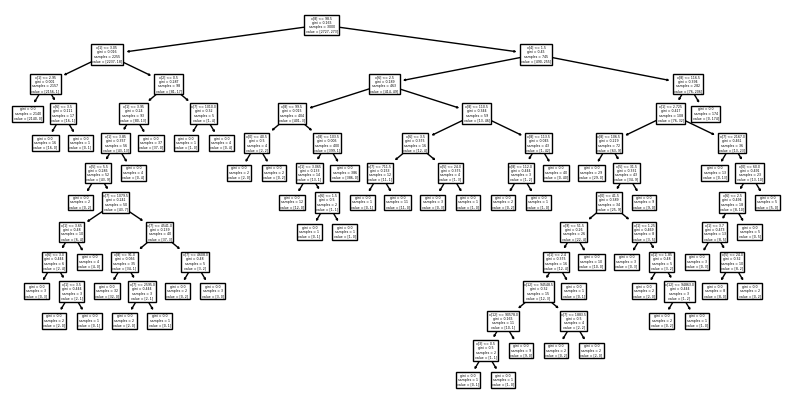

In [43]:
plt.rcParams['figure.figsize'] = [10, 5]
tree.plot_tree(dt)

In [44]:
scores = []

for d in [10, 15,20,25]:
    for s in range(10, 201, 10):
        for l in range(10,201,10):
            dt = DecisionTreeClassifier(max_depth=d,
                                       min_samples_split=s,
                                       min_samples_leaf=l,
                                        random_state=1)
            dt.fit(X_train, y_train)

            y_pred = dt.predict(X_val)
            rmse = np.sqrt(metrics.mean_squared_error(y_val,y_pred))

            scores.append((d, s,l, rmse))

In [45]:
df_scores = pd.DataFrame(scores, columns=['max_depth','min_samples_split','min_samples_leaf', 'rmse'])
df_scores

,max_depth,min_samples_split,min_samples_leaf,rmse
0,10,10,10,0.130384
1,10,10,20,0.126491
2,10,10,30,0.094868
3,10,10,40,0.094868
4,10,10,50,0.122474
...,...,...,...,...
1595,25,200,160,0.202485
1596,25,200,170,0.202485
1597,25,200,180,0.202485
1598,25,200,190,0.202485


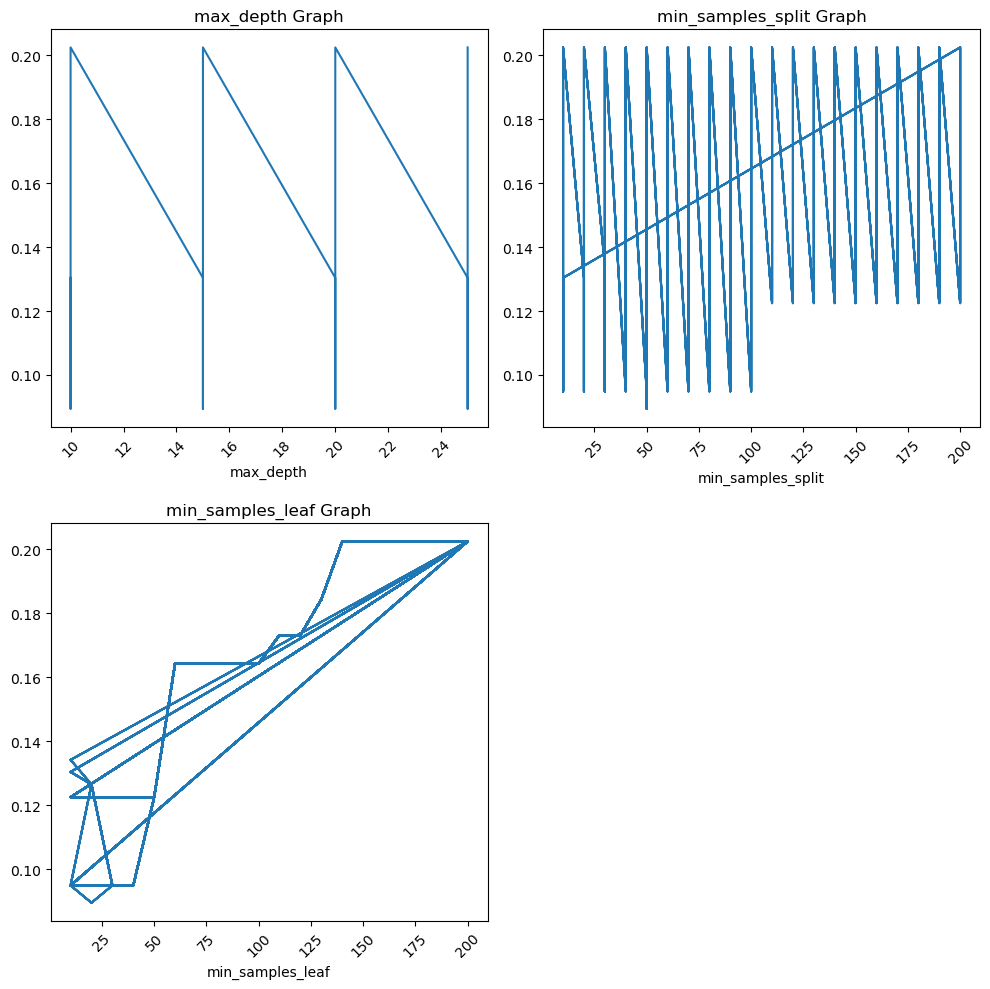

In [46]:
# Define the list of parameters
parameters = ['max_depth', 'min_samples_split', 'min_samples_leaf']

# Define the number of rows and columns for subplots
num_rows = 2
num_cols = 2

# Create a new figure
plt.figure(figsize=(10, 10))

position = 1

for parameter in parameters:
    plt.subplot(num_rows, num_cols, position)
    plt.plot(df_scores[parameter], df_scores['rmse'])  # Use 'rmse' as a string
    plt.xlabel(parameter)
    plt.title(f"{parameter} Graph")
    plt.xticks(rotation=45)
    position = position + 1

# Adjust the layout and add a super title
plt.tight_layout()
plt.show()

In [47]:
dt = DecisionTreeRegressor(max_depth=10,
                                       min_samples_split=50,
                                       min_samples_leaf=20,
                                        random_state=1)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_val)
print ('RMSE:',np.sqrt(metrics.mean_squared_error(y_val,y_pred)))

RMSE: 0.09690007323600468


In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf = RandomForestClassifier(n_estimators=10,
                            random_state=1,
                           n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=1)

In [50]:
y_pred = rf.predict(X_val)

In [51]:
print ('RMSE:',np.sqrt(metrics.mean_squared_error(y_val,y_pred)))

RMSE: 0.11401754250991379


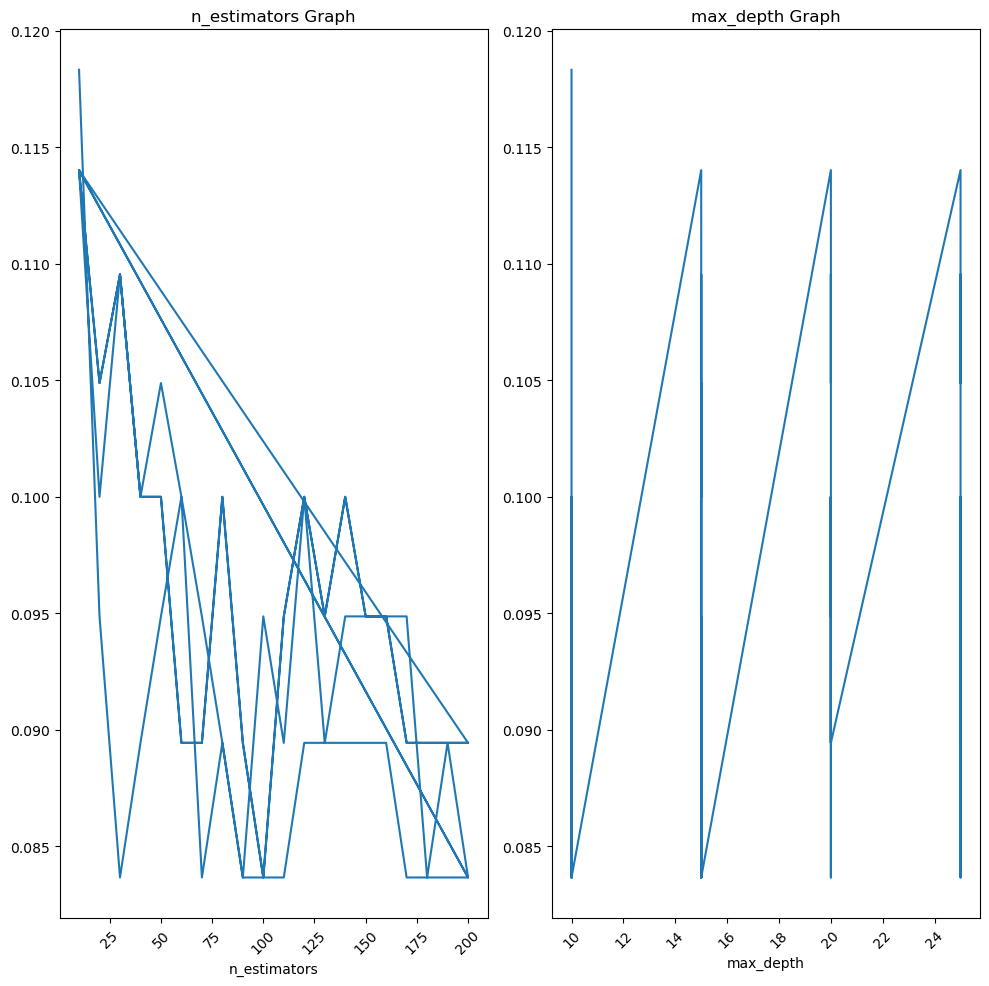

In [52]:
scores = []

for d in [10, 15,20,25]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1,
                                  n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse = np.sqrt(metrics.mean_squared_error(y_val,y_pred))

        scores.append((n, d, rmse))

               
df_scores = pd.DataFrame(scores, columns=['n_estimators','max_depth', 'rmse'])


# Define the list of parameters
parameters = ['n_estimators','max_depth']

# Define the number of rows and columns for subplots
num_rows = 1
num_cols = 2

# Create a new figure
plt.figure(figsize=(10, 10))

position = 1

for parameter in parameters:
    plt.subplot(num_rows, num_cols, position)
    plt.plot(df_scores[parameter], df_scores['rmse'])  # Use 'rmse' as a string
    plt.xlabel(parameter)
    plt.title(f"{parameter} Graph")
    plt.xticks(rotation=45)
    position = position + 1

# Adjust the layout and add a super title
plt.tight_layout()
plt.show()

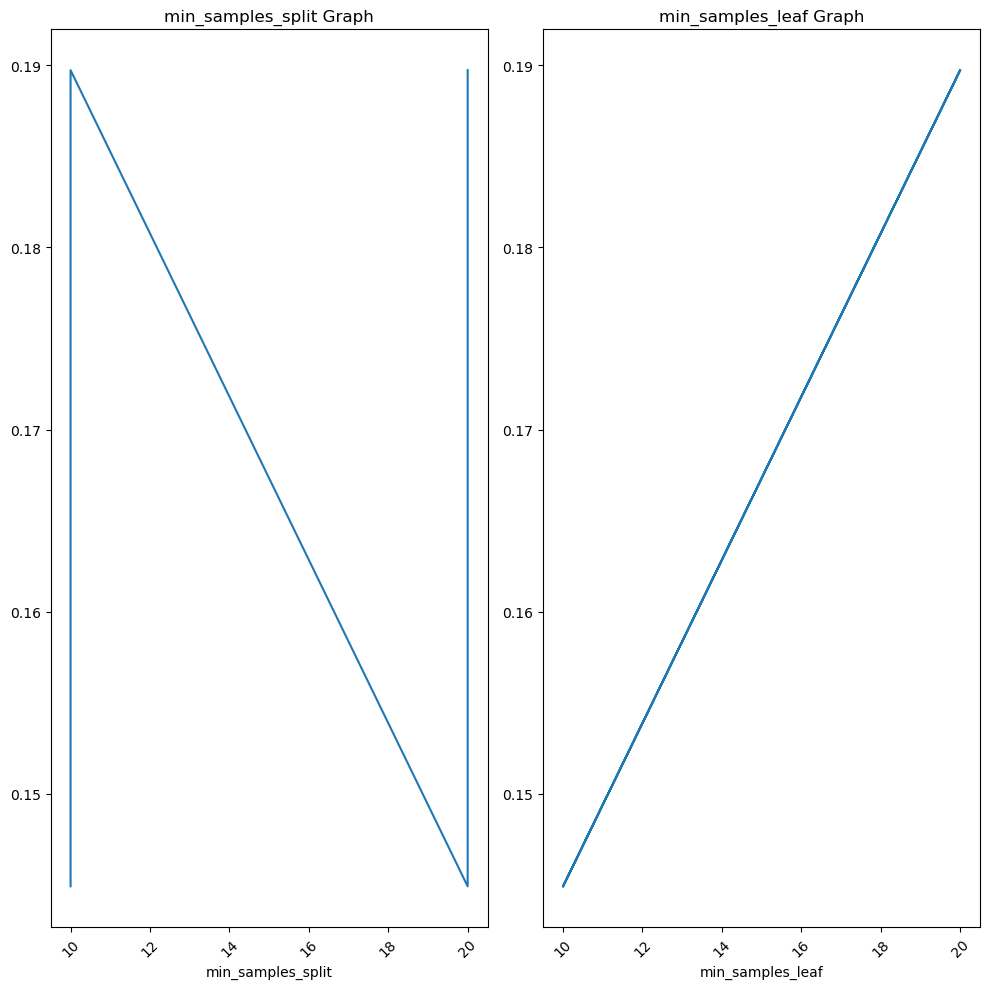

In [53]:
scores = []

for s in range(10, 26, 10):
    for l in range(10,26,10):
         rf = RandomForestClassifier(n_estimators=10,
                                            max_depth=10,
                                           min_samples_split=s,
                                           min_samples_leaf=l,
                                            random_state=1,
                                          n_jobs=-1)
         rf.fit(X_train, y_train)

         y_pred = rf.predict(X_val)
         rmse = np.sqrt(metrics.mean_squared_error(y_val,y_pred))

         scores.append((s, l, rmse))
                
df_scores = pd.DataFrame(scores, columns=['min_samples_split','min_samples_leaf', 'rmse'])


# Define the list of parameters
parameters = ['min_samples_split','min_samples_leaf']

# Define the number of rows and columns for subplots
num_rows = 1
num_cols = 2

# Create a new figure
plt.figure(figsize=(10, 10))

position = 1

for parameter in parameters:
    plt.subplot(num_rows, num_cols, position)
    plt.plot(df_scores[parameter], df_scores['rmse'])  # Use 'rmse' as a string
    plt.xlabel(parameter)
    plt.title(f"{parameter} Graph")
    plt.xticks(rotation=45)
    position = position + 1

# Adjust the layout and add a super title
plt.tight_layout()
plt.show()

In [54]:
rf = RandomForestClassifier(n_estimators=10,
                                            max_depth=10,
                                           min_samples_split=10,
                                           min_samples_leaf=10,
                                            random_state=10,
                                          n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
print ('RMSE:',np.sqrt(metrics.mean_squared_error(y_val,y_pred)))

RMSE: 0.1816590212458495
